In [1]:
import numpy as np
import pandas as pd
import pickle
import json
import os
from river import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the test CSV file
test_file = os.path.join("processed_data", "test_dataset.csv")
test_df = pd.read_csv(test_file)

print("Shape of the dataset:", test_df.shape)

Shape of the dataset: (203807, 41)


In [3]:
# Open model that was saved from previous training phase
with open('models/model.pkl', 'rb') as f:
    model = pickle.load(f)

In [4]:
# Load final features and label mapping
with open('processed_data/final_features.json', 'r') as f:
    final_features = json.load(f)

with open('processed_data/label_mapping.json', 'r') as f:
    label_mapping = json.load(f)

In [5]:
# Evaluation phase
test_acc = metrics.Accuracy()
test_precision = metrics.MacroPrecision()
test_recall = metrics.MacroRecall()
test_f1 = metrics.MacroF1()
test_cm = metrics.ConfusionMatrix()

for _, row in test_df.iterrows():
    x = row[final_features].to_dict()
    y = row['Label']
    
    y_pred = model.predict_one(x)

    test_acc.update(y, y_pred)
    test_precision.update(y, y_pred)
    test_recall.update(y, y_pred)
    test_f1.update(y, y_pred)
    test_cm.update(y, y_pred)

print("\nTesting Results:")
print("Accuracy:", test_acc)
print("Precision (Macro):", test_precision)
print("Recall (Macro):", test_recall)
print("F1-score (Macro):", test_f1)
print("Confusion Matrix:\n", test_cm)


Testing Results:
Accuracy: Accuracy: 98.76%
Precision (Macro): MacroPrecision: 98.49%
Recall (Macro): MacroRecall: 98.75%
F1-score (Macro): MacroF1: 98.62%
Confusion Matrix:
       0.0       1.0      2.0      3.0     
0.0   123,824      375    1,199       72  
1.0       428   25,165       10        0  
2.0       201        0   34,369        0  
3.0       223       16       12   17,913  


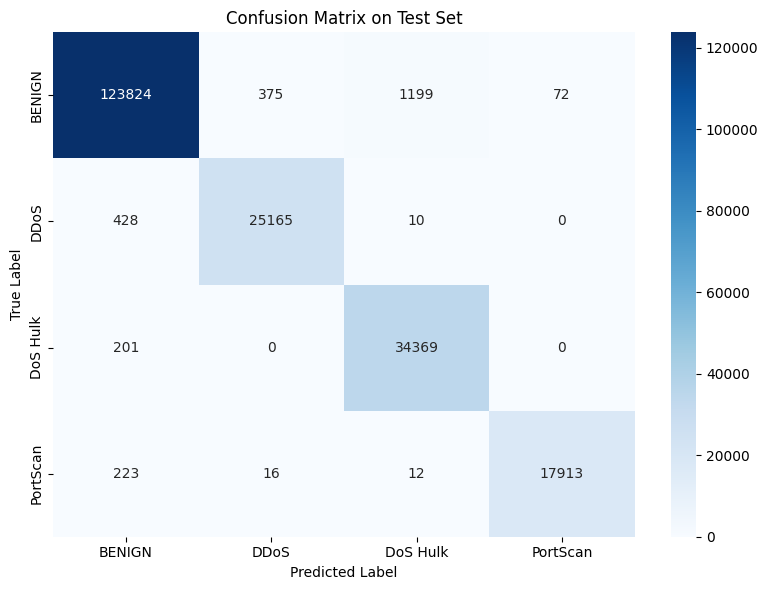

In [6]:
labels = list(label_mapping.values())  
label_names = list(label_mapping.keys()) 

# Initialize matrix 0
conf_matrix = np.zeros((len(labels), len(labels)), dtype=int)

# Take data from test_cm
for true_label in labels:
    for pred_label in labels:
        conf_matrix[true_label][pred_label] = test_cm[true_label][pred_label]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix on Test Set')
plt.tight_layout()
plt.show()